In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [84]:
cp = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\python\car_price.csv') 
cp.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [86]:
cp.isnull().sum()[cp.isnull().sum() > 0]

Series([], dtype: int64)

In [88]:
import numpy as np
cp = cp.replace({'?' : np.nan})
# ? are converted to nulls

In [90]:
cp.isnull().sum()[cp.isnull().sum() > 0]

normalized_losses    41
num_of_doors          2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [92]:
cp['normalized_losses'] = cp['normalized_losses'].astype(float) 
cp['bore'] = cp['bore'].astype(float)
cp['stroke'] = cp['stroke'].astype(float)
cp['horsepower'] = cp['horsepower'].astype(float)
cp['peak_rpm'] = cp['peak_rpm'].astype(float)
cp['price'] = cp['price'].astype(float)


In [94]:
cp.normalized_losses.fillna(cp.normalized_losses.mean(), inplace = True)
cp.num_of_doors.fillna(4, inplace = True)
cp.bore.fillna(cp.bore.mean(), inplace = True)
cp.stroke.fillna(cp.stroke.mean(), inplace =True)
cp.horsepower.fillna(cp.horsepower.mean(), inplace = True)
cp.peak_rpm.fillna(cp.peak_rpm.mean(), inplace = True)
cp = cp.dropna()
# Never do fillna in target variables

In [96]:
cp.isnull().sum()[cp.isnull().sum() > 0]

Series([], dtype: int64)

In [98]:
cp.select_dtypes(include = 'object').columns

Index(['Fuel_type', 'make', 'num_of_doors', 'aspiration', 'wheel_base',
       'engine_location', 'body_style', 'engine_type', 'num_of_cylinders',
       'fuel_system'],
      dtype='object')

In [100]:
cp.num_of_doors.replace({'two' : 2 , 'four' : 4},inplace = True)
cp.num_of_cylinders.replace({'four' : 4, 'six' : 6, 'five' : 5, 'three' : 3, 'twelve' : 12, 'two' : 2, 'eight' : 8}, inplace = True)

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cp[cp.select_dtypes(include='object').columns] = cp[cp.select_dtypes(include='object').columns].apply(le.fit_transform)

In [104]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   Fuel_type          201 non-null    int32  
 3   make               201 non-null    int32  
 4   num_of_doors       201 non-null    int64  
 5   aspiration         201 non-null    int32  
 6   wheel_base         201 non-null    int32  
 7   engine_location    201 non-null    int32  
 8   drive_wheels       201 non-null    float64
 9   body_style         201 non-null    int32  
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    int32  
 15  num_of_cylinders   201 non-null    int64  
 16  engine_size        201 non-null

In [106]:
cp.select_dtypes(include='object').columns

Index([], dtype='object')

In [108]:
from sklearn.model_selection import train_test_split
cp_train, cp_test = train_test_split(cp, test_size=.2 , random_state = 1)

cp_train_x = cp.iloc[:,0:-1]
cp_train_y = cp.iloc[:,-1]

cp_test_x = cp.iloc[:,0:-1]
cp_test_y = cp.iloc[:,-1]

In [110]:
from sklearn.linear_model import LinearRegression
lin_cp = LinearRegression()
lin_cp.fit(cp_train_x, cp_train_y)

LinearRegression()

In [112]:
Rsquare = lin_cp.score(cp_train_x, cp_train_y)
Rsquare

0.8951217559107333

In [114]:
N = cp_train_x.shape[0]
K = cp_train_x.shape[1]
Adj_Rsq = 1 - (1 - Rsquare) * (N - 1)/(N - K - 1)
Adj_Rsq

0.8801391496122666

In [116]:
# Feature selection

In [118]:
cp_x = cp.iloc[:, 0 : -1]
corr_list = []

for col in cp_x.columns:
    corr_list.append(cp.price.corr(cp_x[col]))

In [120]:
feat_imp = pd.DataFrame()
feat_imp['Features'] = cp_x.columns
feat_imp['Corr'] = corr_list
feat_imp 

,Features,Corr
0,symboling,-0.082391
1,normalized_losses,0.133999
2,Fuel_type,-0.110326
3,make,0.179578
4,num_of_doors,0.042435
5,aspiration,-0.072933
6,wheel_base,0.588333
7,engine_location,0.331062
8,drive_wheels,0.584642
9,body_style,-0.163646


In [122]:
l1 = list(feat_imp[(feat_imp.Corr > .1) | (feat_imp.Corr < -.1)].Features)

In [124]:
l1.append('price')

In [126]:
cp = cp.loc[:,l1]
# cp.head()

In [128]:
df1 = cp

In [130]:

from sklearn.model_selection import train_test_split
cp_train, cp_test = train_test_split(cp, test_size=.2 , random_state = 1)

cp_train_x = cp.iloc[:,0:-1]
cp_train_y = cp.iloc[:,-1]

cp_test_x = cp.iloc[:,0:-1]
cp_test_y = cp.iloc[:,-1]

In [135]:
from sklearn.linear_model import LinearRegression
lin_cp = LinearRegression()
lin_cp.fit(cp_train_x, cp_train_y)

LinearRegression()

In [137]:
Rsquare = lin_cp.score(cp_train_x, cp_train_y)
Rsquare

0.88073850535101

In [139]:
N = cp_train_x.shape[0]
K = cp_train_x.shape[1]
Adj_Rsq = 1 - (1 - Rsquare) * (N - 1)/(N - K - 1)
Adj_Rsq

0.8674872281677888

In [141]:
pred_train = lin_cp.predict(cp_train_x)
pred_train

array([12981.98903092, 12981.98903092, 20397.47971583, 13015.0706828 ,
       15466.08991774, 15995.47282642, 20835.22604674, 21349.46595078,
       21831.16861928, 13520.72562493, 13520.72562493, 18052.4838015 ,
       18207.03770489, 20953.49439286, 26688.35631258, 27283.55852754,
       30512.08679533,   444.39032024,  7120.87570047,  7249.30893903,
        6720.08026641,  6941.0562036 ,  9380.86394263,  6982.79622864,
        7044.61778999,  7044.61778999,  9343.92198048, 13396.44459165,
       16587.74374512,  5127.64420597,  7245.12431696,  6238.16539521,
        8319.30059746,  8364.26173299,  8681.05789133,  9790.18487474,
       11127.13971457, 11276.07347602, 11428.07951537,  9689.83598772,
       12527.63908468, 11373.90971228,  9145.63275661, 13696.00965002,
       31478.94617529, 31610.00279298, 40536.25752706,  6630.70847612,
        6875.76536023,  6889.81571508,  6773.60405105,  6768.58541785,
        9994.75872537,  9994.75872537, 10008.80908023, 11892.2530373 ,
      

In [143]:
err_train = cp_train_y - pred_train
err_train

0       513.010969
1      3518.010969
2     -3897.479716
3       934.929317
4      1983.910082
          ...     
200    -677.618947
201     372.060512
202    -421.697340
203    2959.236589
204    4462.203780
Name: price, Length: 201, dtype: float64

In [145]:
err_train.mean()

-6.80537329087803e-12

In [147]:
err_train.kurtosis() + 3

6.037409555239414

(array([ 3.,  1.,  2.,  5.,  3., 14., 11., 13., 18., 30., 24., 17., 20.,
         8., 13.,  9.,  4.,  3.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([-7163.07805883, -6456.59407445, -5750.11009007, -5043.6261057 ,
        -4337.14212132, -3630.65813695, -2924.17415257, -2217.69016819,
        -1511.20618382,  -804.72219944,   -98.23821506,   608.24576931,
         1314.72975369,  2021.21373806,  2727.69772244,  3434.18170682,
         4140.66569119,  4847.14967557,  5553.63365995,  6260.11764432,
         6966.6016287 ,  7673.08561307,  8379.56959745,  9086.05358183,
         9792.5375662 , 10499.02155058, 11205.50553496, 11911.98951933,
        12618.47350371, 13324.95748808, 14031.44147246]),
 <BarContainer object of 30 artists>)

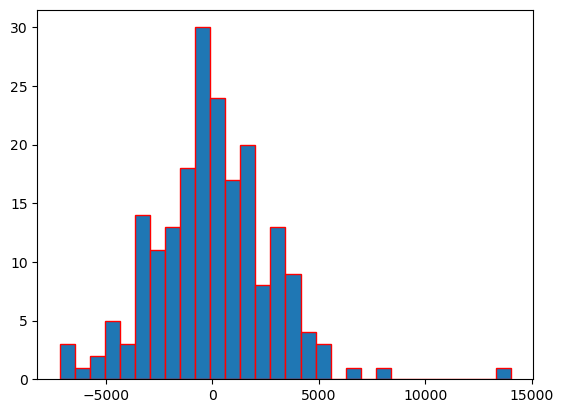

In [149]:
import matplotlib.pyplot as plt
plt.hist(err_train, bins = 30, edgecolor ='red')

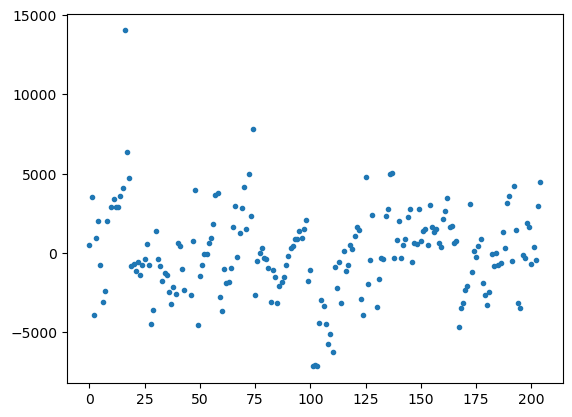

In [151]:
plt.plot(err_train, '.')

<Axes: ylabel='price'>

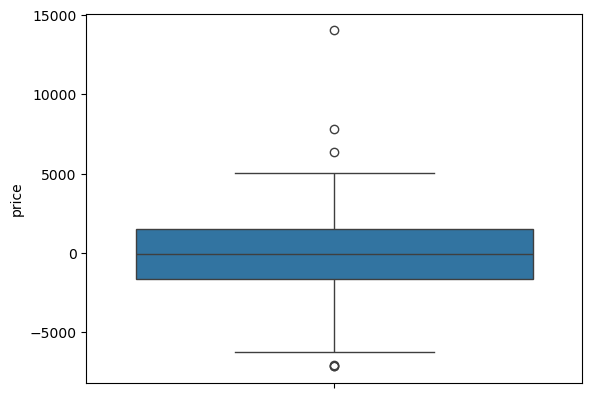

In [153]:
import seaborn as sns
sns.boxplot(err_train)

In [155]:
actual_pred = pd.DataFrame()
actual_pred['Actual'] = cp_train_y
actual_pred['Predicted'] = pred_train

<Axes: xlabel='Actual', ylabel='Predicted'>

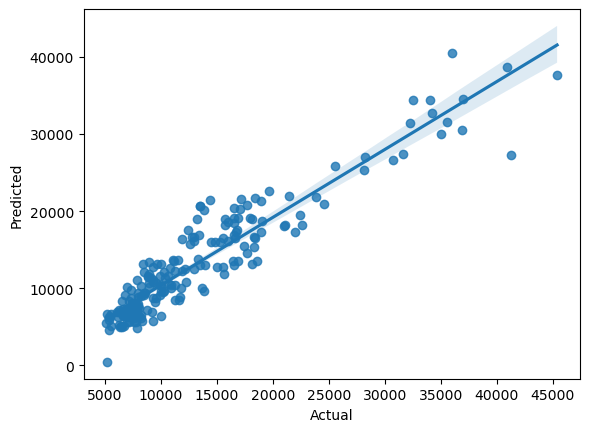

In [157]:
sns.regplot(x = 'Actual' , y = 'Predicted' , data = actual_pred)

In [159]:
# Few outliers might be impactful and few are not impactful
# outlier in starting region is more impactful

# when the point is outlier on y axis it is not more impactful it will drag line but in less number
# But when the point is outlier on x axis it is more impactful it will drag line but in huge number

# here in above data the 1st point between 0 and 5000 is outlier on x axis and will have huge impacts

In [161]:
# remove the outliers
def remove_outliers(df,col,k):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]
    df1 = df.loc[df[col].isin(final_list)];
    print(df1.shape)
    print("Number of outliers removed == > ", df.shape[0] - df1.shape[0])

In [163]:
remove_outliers(cp, 'price',2)


(187, 21)
Number of outliers removed == >  14


In [165]:
actual_pred[actual_pred.Actual < 6000]

,Actual,Predicted
18,5151.0,444.390320
21,5572.0,6720.080266
32,5399.0,6238.165395
50,5195.0,6630.708476
76,5389.0,5920.073290
89,5499.0,6262.302560
118,5572.0,5055.075220
138,5118.0,5451.856879
150,5348.0,4623.097905
